<a href="https://colab.research.google.com/github/YPTusar/Machine-Learning-Lab/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**project 3: Introduction to Deep Neural Network (DNN)**

ETE-456

*ID : 1608013*

**Objective:**

1) Classification problems using Deep Neural Network.

2) Develop DNN models using Tensorflow Framework

In [ ]:
!wget -O diabetes.csv  https://www.dropbox.com/s/sglreynnyx40pb6/diabetes.csv?dl=0

In [ ]:
import numpy as np        
import pandas as pd     
import matplotlib.pyplot as plt       
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
dataset = pd.read_csv('diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
dataset.isnull().value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI    DiabetesPedigreeFunction  Age    Outcome
False        False    False          False          False    False  False                     False  False      768
dtype: int64

In [ ]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
feature = dataset[['Pregnancies','Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age']]  # for independent
target = dataset[['Outcome']]   # for dependent

In [ ]:
feature

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,0,33.6,0.627,50
1,1,85,66,0,26.6,0.351,31
2,8,183,64,0,23.3,0.672,32
3,1,89,66,94,28.1,0.167,21
4,0,137,40,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,10,101,76,180,32.9,0.171,63
764,2,122,70,0,36.8,0.340,27
765,5,121,72,112,26.2,0.245,30
766,1,126,60,0,30.1,0.349,47


In [ ]:
target

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(feature,target,test_size = 0.2,random_state = 0)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(614, 7)
(154, 7)


In [ ]:
X_sc = StandardScaler()
X_train = X_sc.fit_transform(X_train)
X_test = X_sc.transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
#built the neural network architecture
model = Sequential()
model.add(Dense(20, input_dim=7, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                160       
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 381
Trainable params: 381
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#train the neural network on the train dataset
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2)

Epoch 1/200
16/16 [==============================] - 0s 9ms/step - loss: 0.2618 - accuracy: 0.8961 - val_loss: 0.5077 - val_accuracy: 0.8455
Epoch 2/200
16/16 [==============================] - 0s 6ms/step - loss: 0.2621 - accuracy: 0.8982 - val_loss: 0.5126 - val_accuracy: 0.8455
Epoch 3/200
16/16 [==============================] - 0s 6ms/step - loss: 0.2598 - accuracy: 0.8982 - val_loss: 0.5149 - val_accuracy: 0.8455
Epoch 4/200
16/16 [==============================] - 0s 5ms/step - loss: 0.2604 - accuracy: 0.8941 - val_loss: 0.5153 - val_accuracy: 0.8455
Epoch 5/200
16/16 [==============================] - 0s 6ms/step - loss: 0.2593 - accuracy: 0.8921 - val_loss: 0.5188 - val_accuracy: 0.8374
Epoch 6/200
16/16 [==============================] - 0s 5ms/step - loss: 0.2590 - accuracy: 0.8982 - val_loss: 0.5226 - val_accuracy: 0.8374
Epoch 7/200
16/16 [==============================] - 0s 8ms/step - loss: 0.2584 - accuracy: 0.8961 - val_loss: 0.5242 - val_accuracy: 0.8374
Epoch 8/200
1

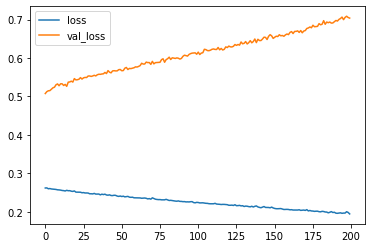

In [ ]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')
plt.legend()

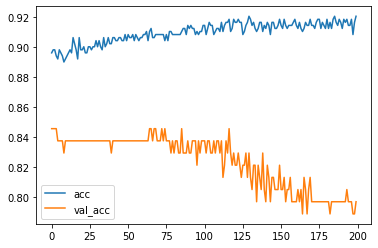

In [ ]:
plt.plot(history_df['accuracy'], label='acc')
plt.plot(history_df['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
y_pred = y_pred > 0.5
y_pred

array([[ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       107
           1       0.64      0.60      0.62        47

    accuracy                           0.77       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.77      0.77      0.77       154

